<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

## *DATA SCIENCE / SECTION 1 / SPRINT 3 / NOTE 2*

# 📝 Assignment


## 1. 주어진 리스트에 대해서 평균, 분산, 표준편차를 구하는 함수를 작성해보세요. (`mean`같은 builtin function 제외)
> 이후 다음 데이터 [243, 278, 184, 249, 207] 에 대해서 해당 함수를 사용한 결과를 보이세요.

In [1]:
# 리스트의 평균 구하기. 모든 리스트의 합 / 리스트의 갯수.
def mymean(v):
  return sum(v)/len(v)

# 리스트의 분산 구하기. 모든 리스트와 평균과의 차들의 제곱 합 / 리스트의 갯수
def myvar(v):
  return sum([(i-mymean(v))**2 for i in v]) / len(v)

# 리스트의 표준편차 구하기. 분산의 제곱근
def mystd(v):
  return (myvar(v))**0.5

v = [243, 278, 184, 249, 207] 
res1 = mymean(v)
res2 = myvar(v)
res3 = mystd(v)

import numpy as np
print('[평균, 분산, 표준편차] : np = {}, my = {}'.format([np.mean(v), np.var(v), np.std(v)], [mymean(v), myvar(v), mystd(v)]))

[평균, 분산, 표준편차] : np = [232.2, 1090.96, 33.02968361943541], my = [232.2, 1090.96, 33.02968361943541]


## 2. 위에서 사용된 데이터와 다음 데이터의 공분산과, 상관계수를 구해보세요 [88, 89, 83, 112, 104] 

In [2]:
# 공분산 구하기. sum((X - mean(X)) * (Y - mean(Y))) / len(X) -> X, Y의 갯수는 같아야함. 모집단의 공분산을 구할때는 len(X)를 쓰고, 표본의 공분산을 구할때는 len(X) - 1 을 써야 합니다.
def mycov(x, y, ddof = 1):  # base ddof = 1
  return sum([(i - mymean(x))*(j - mymean(y)) for i,j in zip(x, y)]) / (len(x) - ddof)

# 상관계수 구하기. 공분산 / (x의 분산 * y의 분산)의 제곱근
def mycorrcoef(x, y, ddof = 1):
  return mycov(x,y, ddof) / (myvar(x)*myvar(y))**0.5

w = [88, 89, 83, 112, 104]
res4 = mycov(v, w, 0) # 공분산
res5 = mycorrcoef(v, w, 0)   # 상관계수

import numpy as np
print('모집단(ddof = 0)의 [공분산, 상관계수] : np = {}, my = {}'.format([np.cov(v, w, ddof = 0)[0,1], np.corrcoef(v, w)[0,1]], [mycov(v, w, 0), mycorrcoef(v, w, 0)]))

모집단(ddof = 0)의 [공분산, 상관계수] : np = [57.36000000000001, 0.1586897351257077], my = [57.35999999999999, 0.15868973512570766]


## 3. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요. 

\begin{align}
g = \begin{bmatrix} 1 & 3 \end{bmatrix}
\qquad
h = \begin{bmatrix} 2 & 6 \end{bmatrix}
\end{align}

In [4]:
# g의 2배인 h 는 g와 같은 선상에 있으므로 두 벡터간의 합, 차를 아무리 해도 선(1차원)으로 표현 할 수 밖에 없다.
res6 = 1  # span (차원 수)
g, h = [1, 3], [2, 6]
print('np = {}차원(선), 구한 span = {}차원(선)'.format(np.linalg.matrix_rank(np.array([g,h])), res6))

np = 1차원(선), 구한 span = 1차원(선)


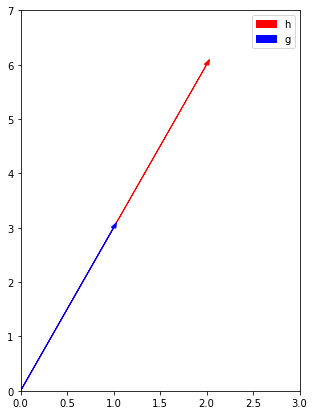

In [5]:
# 그래프로 시각화 해서 보면 이해 하기 쉽다.
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
plt.xlim(0, 3)
plt.ylim(0, 7)
arrow1 = plt.arrow(0, 0, h[0], h[1], head_width=0.05, head_length=0.1, color = 'r', label = 'h')
arrow2 = plt.arrow(0, 0, g[0], g[1], head_width=0.05, head_length=0.1, color = 'b', label = 'g')
plt.legend(handles = (arrow1, arrow2));

## 4. 다음 벡터들의 span과, 이가 의미하는 바를 설명하세요.

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [6]:
# l, m, n 은 서로 독립적이므로 3개의 벡터로 입방체(3차원)을 만들 수 있다.
res7 = 3  # span (차원 수)
l, m, n = [1, 2, 3], [-1, 0, 7], [4, 8, 2]
print('np = {}차원(입방체), 구한 span = {}차원(입방체)'.format(np.linalg.matrix_rank(np.array([l,m,n])), res7))

np = 3차원(입방체), 구한 span = 3차원(입방체)


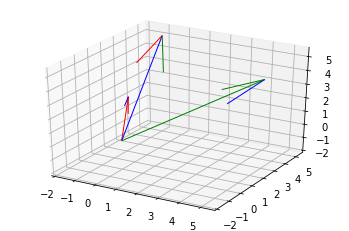

In [7]:
# 벡터 그래프에 그려보기.
import matplotlib.pyplot as plt
O = [0, 0, 0]
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-2,5.5)
ax.set_ylim(-2,5.5)
ax.set_zlim(-2,5.5)
ax.quiver(O, O, O, l, m, n, linewidth=1, color=['r','b','g'])
plt.show()

## 5. 다음 매트릭스의 rank를 구하세요

\begin{align}
P = \begin{bmatrix} 
0 & 2 & 5 \\
 3 & 6 & 12 \\
3 & 2 & 2
\end{bmatrix}
\end{align}

In [8]:
# 매트릭스의 rank 구하기.
import numpy as np

P = np.array([[0, 2, 5],
              [3, 6, 12],
              [3, 2, 2]])
# 첫번째 행을 두번 곱한 것을 세번째 행에 더하면 두번째 행이 나오기 때문에 2차원 !
# 2*[0, 2, 5] = [0, 4, 10]
# [0, 4, 10] + [3, 2, 2] = [3, 6, 12]

res8 = 2  # rank
print('차원 구하기 np = {}차원(평면), res8 = {}차원(평면)'.format(np.linalg.matrix_rank(P), res8))

차원 구하기 np = 2차원(평면), res8 = 2차원(평면)


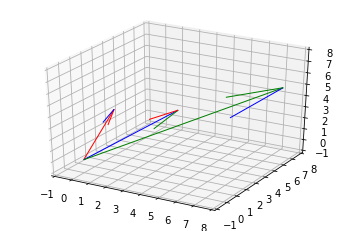

In [9]:
# 그래프로 그려보았다. 3차원에서 2차원이 된 이유는 그림으로 봐가지고는 모르겠다. 
import matplotlib.pyplot as plt
O = [0, 0, 0]
ax = plt.figure().add_subplot(projection='3d')
ax.set_xlim(-1,8)
ax.set_ylim(-1,8)
ax.set_zlim(-1,8)
ax.quiver(O, O, O, P[0], P[1], P[2], linewidth=1, color=['r','b','g'])
plt.show()

In [15]:
mymean([1, 2, 3, 4, 5, 6]), np.mean([1, 2, 3, 4, 5, 6])

(3.5, 3.5)

In [16]:
myvar([1, 2, 3, 4, 5, 6]), np.var([1, 2, 3, 4, 5, 6])

(2.9166666666666665, 2.9166666666666665)

In [24]:
# [1, 2, 3, 4, 5, 6]과 [6, 5, 4, 3, 2, 1]의 공분산을 입력하세요. (순서 의!)
mycov([1, 2, 3, 4, 5, 6], [6, 5, 4, 3, 2, 1], 0), np.cov([1, 2, 3, 4, 5, 6], [6, 5, 4, 3, 2, 1], ddof = 0)

(-2.9166666666666665, array([[ 2.91666667, -2.91666667],
        [-2.91666667,  2.91666667]]))

In [22]:
# [1, 2, 3, 4, 5, 6]과 [6, 5, 4, 3, 2, 1]의 상관계수를 입력하세요. (순서 의!)
mycorrcoef([1, 2, 3, 4, 5, 6], [6, 5, 4, 3, 2, 1], 0), np.corrcoef(([1, 2, 3, 4, 5, 6], [6, 5, 4, 3, 2, 1]))

(-1.0, array([[ 1., -1.],
        [-1.,  1.]]))

# 🔥 도전과제 

주어진 데이터 (x, y)에 대해서 `y = x` 라는 벡터에 대해 projection을 계산하는 함수를 작성하세요. 
- (x, y) 는 (0, 0) 에서 (x, y)로 가는 벡터라 가정합니다.

이후

- 입력된 데이터를 파란색 선으로, 
- `y = x` 라는 벡터를 빨간색 선으로, 마지막으로 
- projection 된 선을 녹색 점선(dashed)으로 그래프에 그리세요.

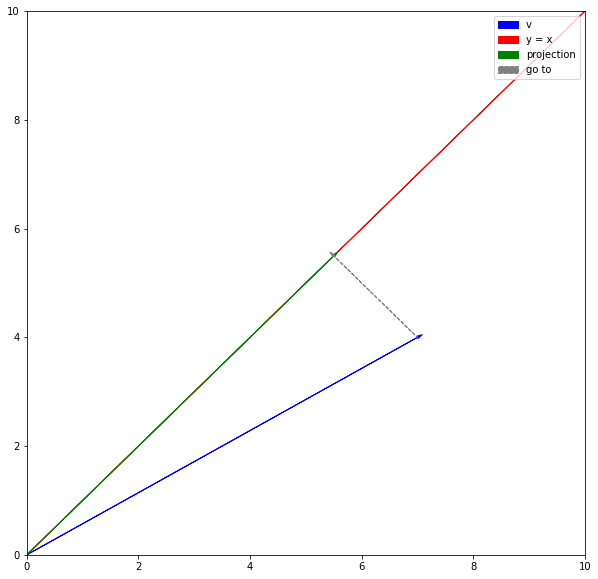

In [10]:
v = [7, 4]

def myProjection(v):
  w = [10, 10]
  import numpy as np
  import matplotlib.pyplot as plt
  w = np.array(w)
  norm = sum(w**2)**0.5           # 투영할 곳의 크기
  u = (np.dot(w,v) / norm**2)*w   # projection 벡터 = (내적 / 투영할 곳 크기의 제곱) * 투영할 곳의 벡터

  plt.figure(figsize = (10,10));
  plt.xlim(0, 10)
  plt.ylim(0, 10)
  line1 = plt.arrow(0 , 0, v[0], v[1],  head_width=0.05, head_length=0.1, color = 'b', label = 'v')   # 입력된 벡터
  line2 = plt.arrow(0 , 0, w[0], w[1],  head_width=0.05, head_length=0.1, color = 'r', label = 'y = x')   # y = x 벡터
  line3 = plt.arrow(0 , 0, u[0], u[1], head_width=0.05, head_length=0.1, color = 'g', label = 'projection')   # projection 된 선
  line4 = plt.arrow(7, 4, u[0]-v[0], u[1]-v[1], head_width=0.05, head_length=0.1, color = 'grey', linestyle = '--', label = 'go to')  # 입력된 벡터에서 y = x 벡터로 내려가는 선
  plt.legend(handles = (line1, line2, line3, line4))

vprime = myProjection(v)